In [3]:
%load_ext sql

In [68]:
%sql duckdb:///data_folder/clean_data.duckdb

In [70]:
%sql df << SELECT * FROM 'all' WHERE region_name IN ('Central Java','Special Region of Yogyakarta','Special Capital Region of Jakarta','Banten', 'Bali', 'West Java', 'Central Java', 'East Java')
data = df.DataFrame()
data.head(1)

Running query in 'duckdb:///data_folder/clean_data.duckdb'

,refresh_date,region_name,score,term,rank,group_in_rank,percent_gain
0,2023-09-24,Special Region of Yogyakarta,16.0,barcelona vs celta,3,2,6300


In [71]:
# Imputation using mode value for score column
mode_value = data['score'].mode()[0]
data['score'].fillna(mode_value, inplace=True)
data.isna().sum()

refresh_date     0
region_name      0
score            0
term             0
rank             0
group_in_rank    0
percent_gain     0
dtype: int64

In [75]:
data.region_name.unique()

array(['Special Region of Yogyakarta',
       'Special Capital Region of Jakarta', 'Banten', 'East Java', 'Bali',
       'Central Java', 'West Java'], dtype=object)

In [76]:
data.head(1)

,refresh_date,region_name,score,term,rank,group_in_rank,percent_gain
0,2023-09-24,Special Region of Yogyakarta,16.0,barcelona vs celta,3,2,6300


In [77]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
# Making the datetime into the correct format
data['refresh_date'] = pd.to_datetime(data['refresh_date'])
data['year'] = data['refresh_date'].dt.year
data['month'] = data['refresh_date'].dt.month
data['day'] = data['refresh_date'].dt.day


<Axes: ylabel='month,region_name'>

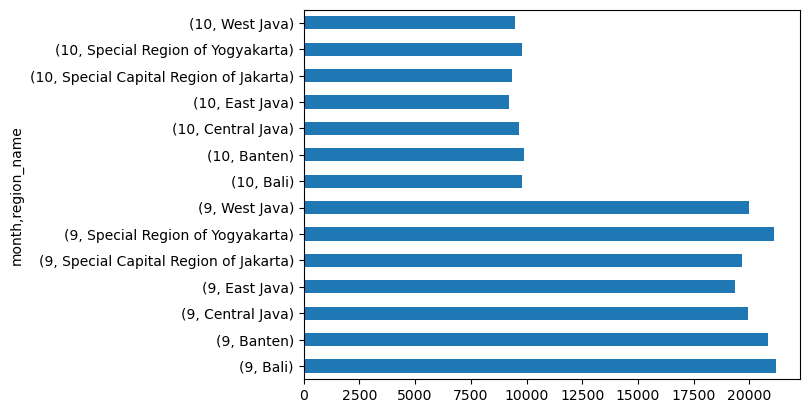

In [79]:
# Checking the data from each region in different dates

data.groupby(['month','region_name']).size().plot(kind='barh')

# In general, there are more data in month 9 compared to 10

In [129]:
data.head(1)

,refresh_date,region_name,score,term,rank,group_in_rank,percent_gain,year,month,day
0,2023-09-24,Special Region of Yogyakarta,16.0,barcelona vs celta,3,2,6300,2023,9,24


In [116]:
# Checking the top terms in all region
top10_data = data.groupby('term').size().reset_index(name='Count').sort_values(by='Count', ascending=False).head(10).sort_values(by='Count')#.plot(x='term',y='Count',kind='barh')
top10_data

,term,Count
198,klasemen liga 1,2286
217,liga champions,2295
335,quizizz,2391
284,pengeluaran sgp,2421
228,liverpool,2508
291,persib,2800
87,data sgp,2813
282,paito sgp,2930
219,liga inggris,3429
223,live draw sgp,4582


In [133]:
# Now we want to see how each term behave in two months across different regions in Java-Bali
top10 = top10_data.term.values.tolist()
filtered_data = data[data['term'].isin(top10)]
filtered_data.columns

Index(['refresh_date', 'region_name', 'score', 'term', 'rank', 'group_in_rank',
       'percent_gain', 'year', 'month', 'day'],
      dtype='object')

In [201]:
def plot_overall():
    # Group by 'refresh_date' and 'term', then count 'score'
    overall_grouped = filtered_data.groupby(['refresh_date', 'term'], as_index=False).agg({'score': 'count'})

    # Create a line plot
    fig = px.line(overall_grouped, 
                  x='refresh_date', 
                  y='score', 
                  color='term',
                  title='Overall Term Scores Over Time',
                  labels={'score': 'Total Score'},
                  )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=False)

    fig.update_layout({
        'plot_bgcolor': 'white',
        'paper_bgcolor': 'white',
    })
    fig.show()

plot_overall()

/Users/immanuelsanka/anaconda3/envs/magicalytics/lib/python3.10/site-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



In [200]:
grouped = filtered_data.groupby(['refresh_date', 'term','region_name'], as_index=False).agg({'score': 'count'})  # or 'mean' if you prefer an average

import plotly.express as px
from ipywidgets import interact

def plot_line(region):
    filtered_df = grouped[grouped['region_name'] == region]
    fig = px.line(filtered_df, 
                  x='refresh_date', 
                  y='score', 
                  color='term',
                  title=f'Term Scores Over Time for {region}',
                  labels={'score': 'Total Score'},
                  )
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', mirror=False)
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', mirror=False)

    fig.update_layout({
        'plot_bgcolor': 'white',
        'paper_bgcolor': 'white',
    })
    fig.show()

regions = grouped['region_name'].unique()
interact(plot_line, region=regions)

interactive(children=(Dropdown(description='region', options=('Bali', 'Banten', 'Central Java', 'East Java', '…

<function __main__.plot_line(region)>

<Axes: xlabel='score', ylabel='term'>

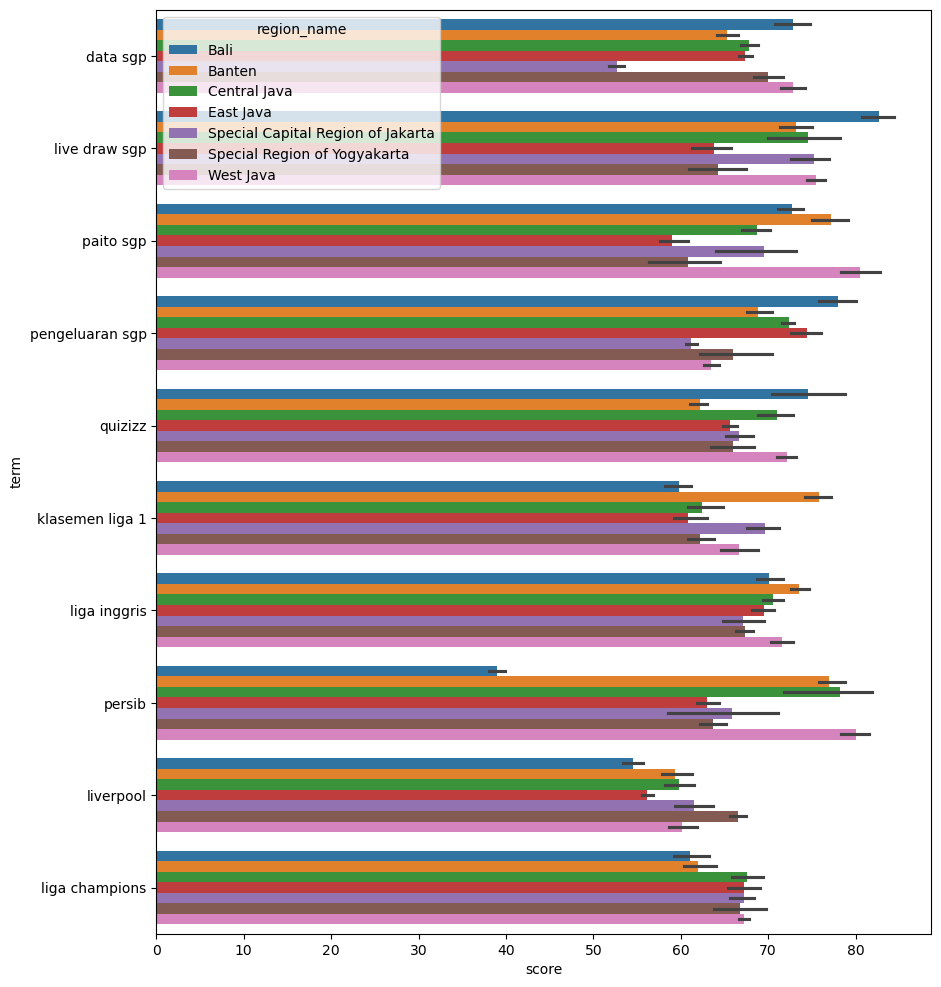

In [219]:
grouped_2 = filtered_data.groupby(['refresh_date', 'term','region_name'], as_index=False).agg({'score': 'count'})  # or 'mean' if you prefer an average
grouped_2

import seaborn as sns
plt.figure(figsize=(10,12))
sns.barplot(x='score', y='term', hue='region_name', data=grouped_2)
